In [6]:
import cv2
import numpy as np
from scipy.spatial.distance import cdist
import pandas as pd
import matplotlib.pyplot as plt
import fracture


read = pd.read_excel('data\distance_angle/56_input_distance.xlsx')
im_first =np.array(cv2.imread('data/distance_angle/ff000001.jpg', cv2.IMREAD_GRAYSCALE ))/255
im_now =np.array(cv2.imread('data/distance_angle/ff000056.jpg', cv2.IMREAD_GRAYSCALE ))/255

im = im_now-im_first



crack_tip_loaction = np.array([[499,1580]])
data = np.array(read)

ratio = 2/278*0.001 # 2mm , mm to m
K=123

distance=[]
Ml_intencity=[]
stress = []



for i in data:
    theta=i[4]
    calculater_location = np.array([[i[2],i[3]]])
    distance_value = cdist(calculater_location, crack_tip_loaction)*ratio
    distance = np.append(distance, distance_value)
    value = np.average(im[int(i[2]):int(i[2]+2),int(i[3]):int(i[3])+2])
    effective_sigma = fracture.K_sigma(K,distance, theta)

    Ml_intencity = np.append(Ml_intencity, value)


data_union = {'Contour N.o.': data[:,0], 'point': data[:,1],
              'location_y': data[:,2], 'location_x': data[:,3],
              'theta': data[:,4], 'distance':distance,
              'ml_intencity':Ml_intencity, 'Stress':effective_sigma, 'K':K}

df = pd.DataFrame(data_union)
df.to_excel('data\distance_angle/56_output_distance_vr02.xlsx')

effective_sigma

array([4616.09779352, 4205.33833775, 4018.50306115, 3971.06323784,
       4104.35583047, 4459.30603111, 5370.32089687, 5998.95585848,
       5921.0308017 , 3418.50872724, 3268.89188701, 3034.44429279,
       2891.12131023, 3055.81374451, 3371.76487007, 3665.45428251,
       3990.48855201, 4077.63527649, 2859.80077195, 2655.61004075,
       2526.90030196, 2376.27940256, 2434.6671795 , 2727.85660973,
       2885.13363322, 3067.31310425, 3231.76873536, 2558.99304175,
       2409.08724291, 2214.35600659, 2060.70650682, 2138.60530462,
       2375.00502112, 2549.1370395 , 2687.69823877, 2736.33658435,
       2341.37817585, 2168.91789604, 1972.5533357 , 1828.96937591,
       1905.07828719, 2093.55679993, 2220.81749404, 2293.84484445,
       2361.49367643, 2183.01052135, 2021.30930337, 1804.06848039,
       1662.54149549, 1746.40060694, 1897.51415224, 1985.65157492,
       2014.8479692 , 2081.84269728, 1957.74646511, 1851.94538423,
       1629.21421029, 1517.33674297, 1602.65766813, 1734.50450

In [3]:
import numpy as np


stress_lsm = np.linspace(0,100000,100001, dtype=int)*0.1
ml_lsm=np.linspace(0,1,10001)

lsm_stress=[]
lsm_ml=[]

for i in stress_lsm:
    x = np.sum(np.power((effective_sigma[0:9]-i),2))
    lsm_stress = np.append(lsm_stress, x)

for i in ml_lsm:
    x = np.sum(np.power((Ml_intencity[0:9]-i),2))
    lsm_ml = np.append(lsm_ml,x)

stress_index = lsm_stress.argmin()
ml_index = lsm_ml.argmin()
print(stress_lsm[stress_index])
print(ml_lsm[ml_index])

10000.0
0.054400000000000004


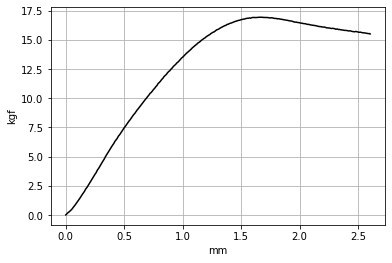

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

read = pd.read_csv('E:/20201008_1.is_tens_RawData/Specimen_RawData_1.csv',encoding='CP949')
df = np.array(read)
strain = df[:,0]
stress = df[:,1]

plt.plot(strain,stress,c = 'black')
plt.xlabel('mm')
plt.ylabel('kgf')
plt.grid()
plt.savefig('./fracture test.jpeg',dpi = 300)
plt.show()
